# 作業 3-2

本作業使用 [Online Shoppers Purchasing Intention Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) 所提供的資料，根據網頁的瀏覽情況、顧客的類型以及日期的資訊預測該名顧客是否會消費(Revenue)。


## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|Windows 10|
|程式執行環境|jupyter notebook|6.0.1|
|python 版本|python3|3.7.3|
|安裝環境|conda|4.7.12|

## 安裝

請填寫安裝套件需要的指令

```sh
pip install -r requirements.txt
```

## 計算資源

請填寫執行程式所需要的計算資源，請確保所有資源限制在單一個人桌上型電腦且能夠以總市價低於 5 萬的手段取得。

|計算資源|答案|
|-|-|
|使用 CPU 核心數|1|
|記憶體需求|$\leq 1$GB|
|有無使用 GPU|無|
|GPU 版本|無|
|GPU 記憶體需求|$\leq 1$GB|

In [1]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('online_shoppers_intention.csv')      # 讀取資料，請勿更改路徑

## 資料分析與前處理-確認各特徵與消費與否之相關性

**原因**:
    為了決定哪些特徵適合作為模型的輸入，以下將逐個探究各特徵與消費與否之相關性，並以視覺化作為輔助。
    
**流程**：

1. 觀察整體數據


In [2]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
df.Revenue = df.Revenue.apply(lambda x : 1 if x else 0)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



12330 * 0.154745

1908.00585

透過轉換之後，我們看到正面樣本只佔全部樣本的百分之十五左右而已，這樣嚴重的資料不平衡意味著在接下來的處理中，我們必須用其它的指標來取代準確度，否則就會產生只猜False也能得到85%準確度的繆誤。

2. 觀察各特徵對結果的影響
    
    - 2-1 
    
    首先從 `OS ` 著手。從下面的圖表可看出不同的作業系統對Revenue的影響沒有顯著的差異。而且某些OS的使用者樣本數過少，應該不是一個很強的特徵。

,OperatingSystems,Revenue
0,1,0.15
1,2,0.17
2,3,0.10
3,4,0.18
4,5,0.17
5,6,0.11
6,7,0.14
7,8,0.22


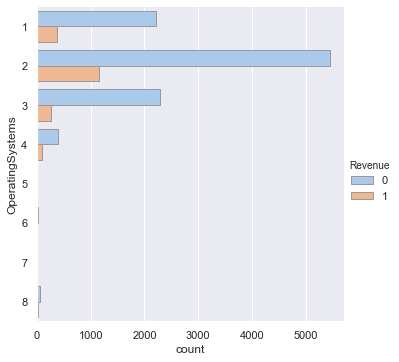

In [5]:
sns.set(style="darkgrid")

sns.catplot(y="OperatingSystems", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["OperatingSystems", "Revenue"]].groupby(['OperatingSystems'], as_index=False).mean().round(2))


     
  -  ` Region ` 也是差不多的情形。

,Region,Revenue
0,1,0.16
1,2,0.17
2,3,0.15
3,4,0.15
4,5,0.16
5,6,0.14
6,7,0.16
7,8,0.13
8,9,0.17


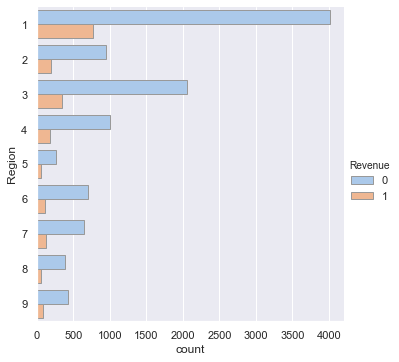

In [6]:
sns.set(style="darkgrid")

sns.catplot(y="Region", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["Region", "Revenue"]].groupby(['Region'], as_index=False).mean().round(2))

,Browser,Revenue
0,1,0.15
1,2,0.15
2,3,0.05
3,4,0.18
4,5,0.18
5,6,0.11
6,7,0.12
7,8,0.16
8,9,0.00
9,10,0.20


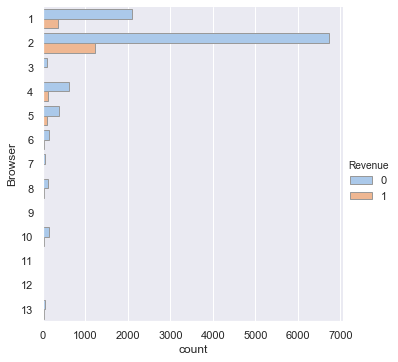

In [7]:
sns.set(style="darkgrid")

sns.catplot(y="Browser", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["Browser", "Revenue"]].groupby(['Browser'], as_index=False).mean().round(2))


     
  -  ` Traffic Type ` 的指標性就比較明顯了。甚至某些類別的收益為零。推測可能是使用的交通工具和消費者的經濟有某種程度上的關聯。不過之所以會有這樣的差異也和各個類別本身的樣本數有關。是否要納入訓練特徵還需要考慮一下。上面的 `browser`屬性同理，只是彼此間的差距又更不明顯了。

,TrafficType,Revenue
0,1,0.11
1,2,0.22
2,3,0.09
3,4,0.15
4,5,0.22
5,6,0.12
6,7,0.30
7,8,0.28
8,9,0.10
9,10,0.20


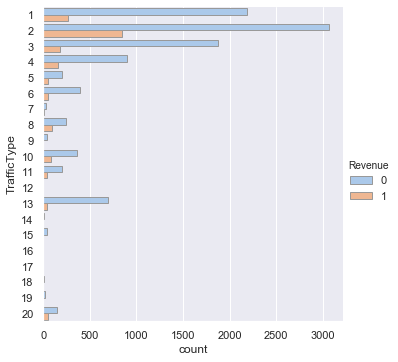

In [8]:
sns.set(style="darkgrid")

sns.catplot(y="TrafficType", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["TrafficType", "Revenue"]].groupby(['TrafficType'], as_index=False).mean().round(2))


     
  - 接著觀察 ` Month ` 。五月是擁有最多記錄的，但相對的消費人數卻很低。二月之所以那麼低應該是樣本數太少的緣故。至少我們可以看出十一月的客人消費慾望是比較高的。

,Month,Revenue
0,Aug,0.18
1,Dec,0.13
2,Feb,0.02
3,Jul,0.15
4,June,0.10
5,Mar,0.10
6,May,0.11
7,Nov,0.25
8,Oct,0.21
9,Sep,0.19


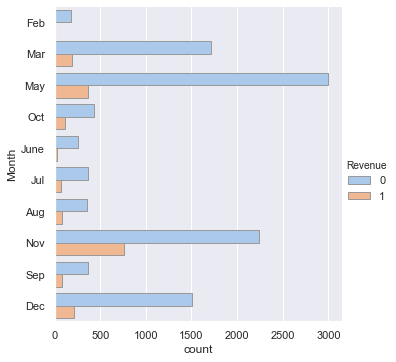

In [9]:
sns.set(style="darkgrid")

sns.catplot(y="Month", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["Month", "Revenue"]].groupby(['Month'], as_index=False).mean().round(2))


     
  -  ` VisitorType ` 、` Weekend ` 和是否購買沒有很相關的樣子。

,VisitorType,Revenue
0,New_Visitor,0.25
1,Other,0.19
2,Returning_Visitor,0.14


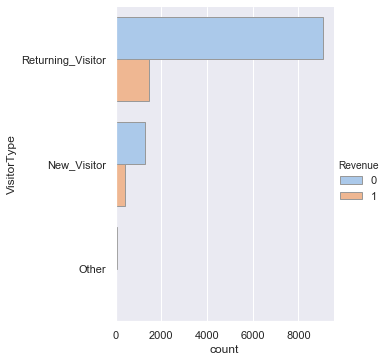

In [10]:
sns.set(style="darkgrid")

sns.catplot(y="VisitorType", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["VisitorType", "Revenue"]].groupby(['VisitorType'], as_index=False).mean().round(2))

,Weekend,Revenue
0,False,0.15
1,True,0.17


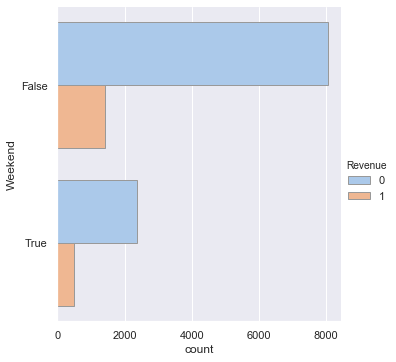

In [11]:
sns.set(style="darkgrid")

sns.catplot(y="Weekend", hue="Revenue", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

display(df[["Weekend", "Revenue"]].groupby(['Weekend'], as_index=False).mean().round(2))


     
  - 緊接著看看 ` Administrative `，也就是點擊行政類型網頁的使用者次數和購買意願的關聯性。某些區段的數據有點過於偏頗，不適合直接拿來使用。就算切成幾個區間看起來也沒什麼鑑別度的樣子。

E:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


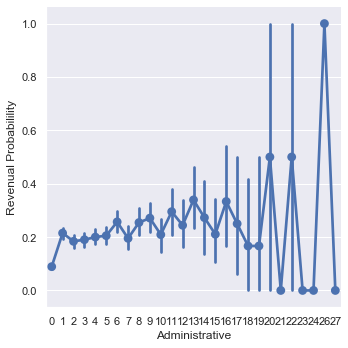

In [12]:
g = sns.factorplot(x='Administrative', y='Revenue',data=df)
g = g.set_ylabels("Revenual Probabilility")


     
  - ` Informational `有類似的情形。不過看樣子可以以12次為界，切分成有點意願和完全沒有意願的兩個區間。

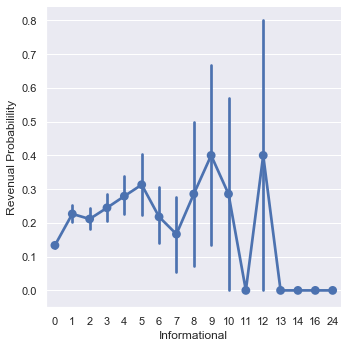

In [13]:
g = sns.factorplot(x='Informational', y='Revenue',data=df)
g = g.set_ylabels("Revenual Probabilility")


     
  - ` SpecialDay `的結果有些微妙。它代表的該筆紀錄的日期接近重要節日的程度，如為1則代表非常接近。然而下圖顯示出來的趨勢卻是離重要節日越遠購買意願越高的樣子。可能要再觀察一下才把它放進模型的訓練特徵。

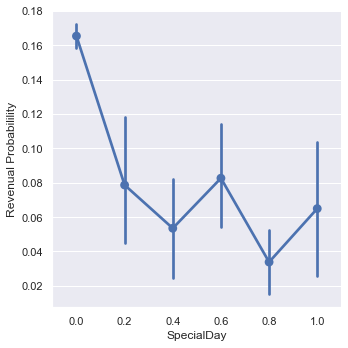

In [14]:
g = sns.factorplot(x='SpecialDay', y='Revenue',data=df)
g = g.set_ylabels("Revenual Probabilility")


     
  - 由於` ProductRelated `範圍過廣，直接觀察並不適合，這裡先把它畫分成六個區間。從結果可看出點擊產品相關網頁越多次，購買率的確是有上升的趨勢沒有錯。

E:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


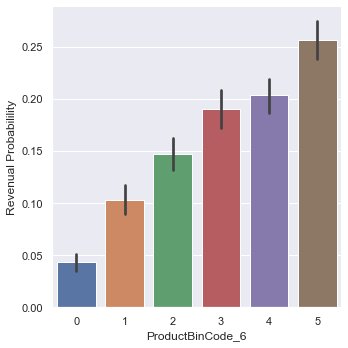

In [15]:
from sklearn.preprocessing import LabelEncoder
df['ProductBin_6'] = pd.qcut(df['ProductRelated'], 6,duplicates='drop')
label = LabelEncoder()
df['ProductBinCode_6'] = label.fit_transform(df['ProductBin_6'])

g = sns.factorplot(x='ProductBinCode_6', y='Revenue',data=df,kind='bar')
g = g.set_ylabels("Revenual Probabilility")


     
  - 然後是` Administrative_Duration `，也就是停留在行政網頁的時長和消費意願的關聯性調查。第二到第四區間都差不到，但停留在行政網頁較少的那群人明顯購買的意願更低，或許可以作為參考。下面的` ProductRelated_Duration ` 與之類似，只是區別更為明顯。然而它的分布和上面的ProductRelated有點雷同，同時加入訓練特徵的話可能會過於強調。

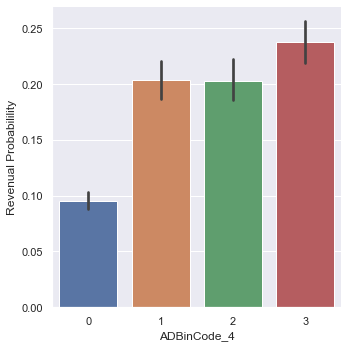

In [16]:
df['ADBin_4'] = pd.qcut(df['Administrative_Duration'], 6,duplicates='drop')
label = LabelEncoder()
df['ADBinCode_4'] = label.fit_transform(df['ADBin_4'])

g = sns.factorplot(x='ADBinCode_4', y='Revenue',data=df,kind='bar')
g = g.set_ylabels("Revenual Probabilility")

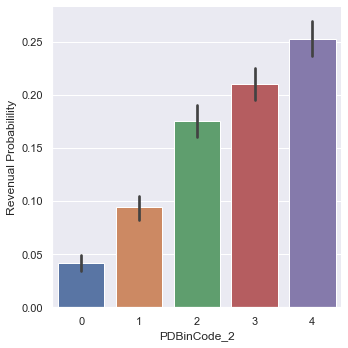

In [17]:
df['PDBin_2'] = pd.qcut(df['ProductRelated_Duration'], 5,duplicates='drop')
label = LabelEncoder()
df['PDBinCode_2'] = label.fit_transform(df['PDBin_2'])

g = sns.factorplot(x='PDBinCode_2', y='Revenue',data=df,kind='bar')
g = g.set_ylabels("Revenual Probabilility")


     
  - ` Informational_Duration `看起來則沒什麼區別。暫時不考慮它的加入。

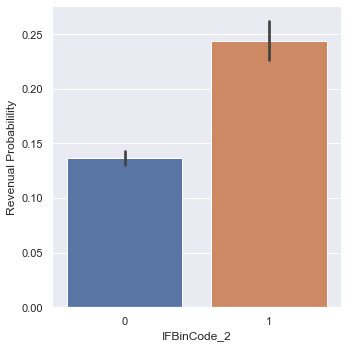

In [18]:
df['IFBin_2'] = pd.qcut(df['Informational_Duration'], 6,duplicates='drop')
label = LabelEncoder()
df['IFBinCode_2'] = label.fit_transform(df['IFBin_2'])

g = sns.factorplot(x='IFBinCode_2', y='Revenue',data=df,kind='bar')
g = g.set_ylabels("Revenual Probabilility")


     
  - ` BounceRates ` 和 ` ExitRates ` 都是用來計算網頁熱門度的量尺，以下用盒狀圖來觀察其集中的趨勢。相較於BounceRate，ExitRates更能看出什麼的樣子，開完該網頁就關掉瀏覽器的人選擇購買的傾向更低的樣子。

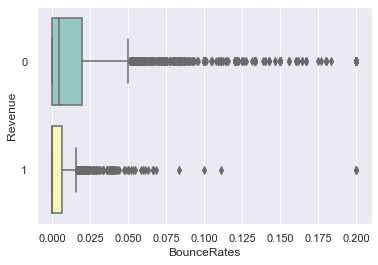

In [19]:
sns.boxplot(y="Revenue", x = "BounceRates", orient="h",
            palette="Set3", data=df)

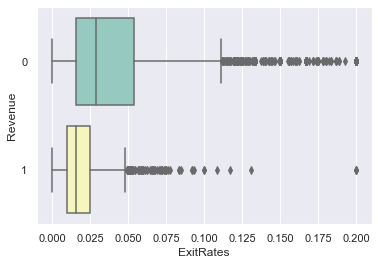

In [20]:
sns.boxplot(y="Revenue", x = "ExitRates", orient="h",
            palette="Set3", data=df)


     
  - 和上面兩個指標有所關聯的還有` PageValues ` ,它所代表的是完成線上交易前有瀏覽該網站的傾向。用一樣的盒狀圖分析後，可發現不購買的分布完全是被擠扁的狀態，或許這是一個滿強的訊號。

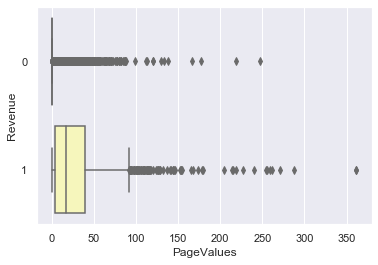

In [21]:
sns.boxplot(y="Revenue", x = "PageValues", orient="h",
            palette="Set3", data=df)

這個資料集並沒有缺值，不需要額外的處理。接下來先對一些數值性的資料作區段化，然後由於沒有提供測試資料集的關係，將在本來的資料集隨機抽樣3成作為測試。

In [22]:
#前處理

label = LabelEncoder()
df['BRBin_3'] = pd.qcut(df['BounceRates'], 5,duplicates='drop')
df['BRBinCode_3'] = label.fit_transform(df['BRBin_3'])

df['ERBin_5'] = pd.qcut(df['ExitRates'], 5,duplicates='drop')
df['ERBinCode_5'] = label.fit_transform(df['ERBin_5'])

df['PVBin_2'] = pd.qcut(df['PageValues'], 5,duplicates='drop')
df['PVBinCode_2'] = label.fit_transform(df['PVBin_2'])


df['SpCode'] = label.fit_transform(df['SpecialDay'])
df['MonthCode'] = label.fit_transform(df['Month'])
df['VsCode'] = label.fit_transform(df['VisitorType'])
df['AdminCode'] = label.fit_transform(df['Administrative'])

df.Weekend = df.Weekend.apply(lambda x : 1 if x else 0)



In [23]:
#分割訓練集及測試集
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1012)

## 模型訓練

### 1. Startup
  一開始先利用KNN可以根據最近的點找出答案的特性，建立一個最基本的雛型，並使用F1 Score 取代原本的accuracy計算方式。和前面所說的一樣，這是因為這個資料集的負面樣本遠多於正面樣本，而這個網站購物意願調查的最根本目的又是為了促進客戶消費，Recall十分重要，一個只能準確判斷負面樣本的模型是不適用的。而F1 Score的計算方式是precision和recall的調和平均數，在懲罰把正面樣本當成負面樣本的同時也保證不會一股腦地把所有可能的答案拋出。
     
   起初本來是想把最有可能的特徵當作baseline，然後再陸續加入其它訊號，但這樣f1 score的計算似乎會產生問題的樣子，於是決定先加入所有特徵，然後在一一剔出會造成混淆的屬性來最佳化模型。
   


In [24]:
train_x = df_train[['OperatingSystems','Region','TrafficType','Browser','BRBinCode_3','ERBinCode_5','PVBinCode_2','SpCode','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
train_y = df_train[['Revenue']]

In [25]:
test_x = df_test[['OperatingSystems','Region','TrafficType','Browser','BRBinCode_3','ERBinCode_5','PVBinCode_2','SpCode','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
test_y = df_test[['Revenue']]

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.metrics import f1_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具


# knn模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = KNeighborsClassifier(p=2) # 創造KNN模型
    model.fit(train_x_split, train_y_split)           # 訓練KNN模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = KNeighborsClassifier(p=2) 
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = f1_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

average train accuracy: 0.4942012347405697
    min train accuracy: 0.4801536491677337
    max train accuracy: 0.5073295092415552
average valid accuracy: 0.2906569454132219
    min valid accuracy: 0.26315789473684215
    max valid accuracy: 0.3181818181818182


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Total accuracy: 0.510831234256927


In [27]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.27460510328068044


第一次嘗試得到的結果還挺慘不忍睹的，不僅是test accuracy只有0.27這種比亂猜都低很多的分數，就連train accuracy也只有0.5左右。或許是我們的的確確植入了過多的噪音，又或者我們挑選的分類器本來就不適用於這種場合。接下來先換其它的分類器試試。

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.metrics import f1_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具


# Naive Bayes之模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = GaussianNB(var_smoothing=1e-2) # 創造貝氏模型
    model.fit(train_x_split, train_y_split)           # 訓練貝氏模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = GaussianNB(var_smoothing=1e-2) 
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = f1_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

average train accuracy: 0.5016913739547096
    min train accuracy: 0.49705997647981187
    max train accuracy: 0.5068807339449541
average valid accuracy: 0.49878885033126885
    min valid accuracy: 0.4610492845786963
    max valid accuracy: 0.5310559006211181
Total accuracy: 0.5030674846625768


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [29]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.5240174672489084


本來以為貝氏模型的先驗機率會有很大的幫助，這一次雖然訓練的準確度依然看起來依然沒有什麼起色，但至少valid accuracy和test accuracy比較正常一點了，這說明了分類性的挑選的確有其重要性。這個結果仍是讓人非常不滿意，還是得再接再厲找尋更強的模型。

In [30]:
from sklearn.impute import SimpleImputer          # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder    # 匯入 Label Encoder
from sklearn.svm import SVC                       # 匯入支援向量機模型
from sklearn.metrics import accuracy_score        # 匯入準確度計算工具
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import f1_score            # 匯入準確度計算工具

# SVM之模型訓練

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = SVC(random_state=1012, kernel='rbf', gamma='scale') # 創造SVM模型
    model.fit(train_x_split, train_y_split)           # 訓練SVM模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

#計算整體整確度
model = SVC(random_state=1012, kernel='rbf', gamma='scale')
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)       
train_acc = f1_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')



E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

average train accuracy: 0.6104825005012775
    min train accuracy: 0.6005390835579515
    max train accuracy: 0.6211886304909561
average valid accuracy: 0.5899056899309876
    min valid accuracy: 0.5762004175365345
    max valid accuracy: 0.6013071895424836


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total accuracy: 0.6113207547169811


In [31]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.6320754716981132


改用支持向量機後，train accuracy和test accuracy都有很大的成長！原因可能是SVM抗雜訊的能力以及各種特徵的組合是高於其它二者的。我們還要再看看有沒有比這個更強的分類器。

In [32]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score, f1_score       # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))


#計算整體整確度
model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8)
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)  
train_acc = f1_score(train_y, train_pred_y)
#train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

average train accuracy: 0.6808857891643465
    min train accuracy: 0.6632939853850477
    max train accuracy: 0.6973821989528796
average valid accuracy: 0.5854293023843645
    min valid accuracy: 0.5046296296296297
    max valid accuracy: 0.6311475409836065
Total accuracy: 0.7004318806438948


In [33]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.645045045045045


再度換成決策樹後，兩項指標都有微幅的成長。看來這樣二元分類的問題是用決策樹的效果不錯。分類器的挑選就到此為止，接下來將剔除不必要的特徵，讓模型達到最高的效能。

In [34]:
train_x = df_train[['OperatingSystems','TrafficType','Browser','BRBinCode_3','ERBinCode_5','PVBinCode_2','SpCode','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
train_y = df_train[['Revenue']]

In [35]:
test_x = df_test[['OperatingSystems','TrafficType','Browser','BRBinCode_3','ERBinCode_5','PVBinCode_2','SpCode','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
test_y = df_test[['Revenue']]

In [36]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score, f1_score       # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))


#計算整體整確度
model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8)
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)  
train_acc = f1_score(train_y, train_pred_y)
#train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

average train accuracy: 0.6794978976618051
    min train accuracy: 0.6636720943290285
    max train accuracy: 0.6921038685744568
average valid accuracy: 0.5930195703015737
    min valid accuracy: 0.5555555555555556
    max valid accuracy: 0.628099173553719
Total accuracy: 0.700352526439483


In [37]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.6480648064806479


把視覺化時覺得沒什麼關聯性的Region剔除後，雖然train accuracy降低了一點點，但test的結果也變好了一點點。這邊決定將其捨棄掉。

In [38]:
train_x = df_train[['OperatingSystems','Browser','ERBinCode_5','PVBinCode_2','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
train_y = df_train[['Revenue']]

test_x = df_test[['OperatingSystems', 'Browser','ERBinCode_5','PVBinCode_2','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend']]
test_y = df_test[['Revenue']]

In [39]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score, f1_score       # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))


#計算整體整確度
model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8)
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)  
train_acc = f1_score(train_y, train_pred_y)
#train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

average train accuracy: 0.6751095798580813
    min train accuracy: 0.6529477196885428
    max train accuracy: 0.6854508196721311
average valid accuracy: 0.6006638603126356
    min valid accuracy: 0.5400457665903889
    max valid accuracy: 0.6574257425742575
Total accuracy: 0.6963562753036437


In [40]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.6518105849582172


仿照上面依序把會造成混淆的TrafficType和SpecialDay依序丟掉之後，test accuracy已經來到了0.652。反覆實驗後發現PageValue其實是最重要的屬性，少了它了後模型即刻崩潰，甚至比用KNN更慘。其它理論上沒什麼關聯性的屬性經實驗後刪除多多少少會讓test accuracy反而往下降，這邊決定停手並另闢蹊徑。視覺化的部分提到可以將Information以12為界分成二元區間，但實際測試沒有很成功的樣子。由於注意到PageValue的重要性，決定建立一個TimePerPR屬性，代表的是平均點擊每個產品網站花了多少時間。利用它作成數個區間後，test accuracy勉強來到了0.654。從一開始的三成都不到，到最後接近有六成五，雖然還有很大的空間可以做得更好，這個模型的確一步步地在改善。

In [41]:
df_train['TimePerPR'] = df_train['ProductRelated_Duration'] / df_train['ProductRelated']
df_train['TimePerPR'] = df_train['TimePerPR'].fillna(0)
df_train['TimePerPRBin_2'] = pd.qcut(df_train['TimePerPR'], 5,duplicates='drop')
label = LabelEncoder()
df_train['TimePerPRBinCode_2'] = label.fit_transform(df_train['TimePerPRBin_2'])

df_test['TimePerPR'] = df_test['ProductRelated_Duration'] / df_test['ProductRelated']
df_test['TimePerPR'] = df_test['TimePerPR'].fillna(0)
df_test['TimePerPRBin_2'] = pd.qcut(df_test['TimePerPR'], 5,duplicates='drop')
df_test['TimePerPRBinCode_2'] = label.fit_transform(df_test['TimePerPRBin_2'])



E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [42]:
train_x = df_train[['OperatingSystems','Browser','ERBinCode_5','PVBinCode_2','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend','TimePerPRBinCode_2']]
train_y = df_train[['Revenue']]

test_x = df_test[['OperatingSystems', 'Browser','ERBinCode_5','PVBinCode_2','MonthCode','AdminCode'
                   ,'VsCode','IFBinCode_2','PDBinCode_2','ADBinCode_4','ProductBinCode_6','Weekend','TimePerPRBinCode_2']]
test_y = df_test[['Revenue']]

In [43]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score, f1_score       # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8) # 創造決策樹模型
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = f1_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = f1_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))


#計算整體整確度
model = DecisionTreeClassifier(random_state=1012, criterion='entropy', max_depth=8)
model.fit(train_x, train_y)           
    
train_pred_y = model.predict(train_x)  
train_acc = f1_score(train_y, train_pred_y)
#train_acc = accuracy_score(train_y, train_pred_y)
print(f'Total accuracy: {train_acc}')

average train accuracy: 0.6778375503030543
    min train accuracy: 0.6651532349602725
    max train accuracy: 0.6905876235049402
average valid accuracy: 0.6000964619881828
    min valid accuracy: 0.5330188679245284
    max valid accuracy: 0.6560636182902585
Total accuracy: 0.6854974704890388


In [44]:
test_pred_y = model.predict(test_x)       
test_acc = f1_score(test_y, test_pred_y)
print(f'Total accuracy: {test_acc}')

Total accuracy: 0.65359477124183


最後以clasification報表結束這次的分析以及預測。果然負面樣本的準確率已經可以非常高了。如果我們有更多的有效的正面樣本的話，一定能得到更佳的預測結果。

In [45]:
from sklearn.metrics import classification_report
cr = classification_report(test_y, test_pred_y)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3120
           1       0.71      0.60      0.65       579

    accuracy                           0.90      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.89      0.90      0.90      3699



In [46]:
#請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 55.68268632888794
